In [2]:
import pandas as pd
import numpy as np
import scipy.io
import random, math
from sklearn.decomposition import PCA
from sklearn import manifold
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
def Plot2D(T, title, x, y, num_to_plot=40):
  # This method picks a bunch of random samples (images in your case)
  # to plot onto the chart:
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.set_title(title)
  ax.set_xlabel('Component: {0}'.format(x))
  ax.set_ylabel('Component: {0}'.format(y))
  x_size = (max(T[:,x]) - min(T[:,x])) * 0.08
  y_size = (max(T[:,y]) - min(T[:,y])) * 0.08
  for i in range(num_to_plot):
    img_num = int(random.random() * num_images)
    x0, y0 = T[img_num,x]-x_size/2., T[img_num,y]-y_size/2.
    x1, y1 = T[img_num,x]+x_size/2., T[img_num,y]+y_size/2.
    img = df.iloc[img_num,:].reshape(num_pixels, num_pixels)
    ax.imshow(img, aspect='auto', cmap=plt.cm.gray, interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

  # It also plots the full scatter:
  ax.scatter(T[:,x],T[:,y], marker='.',alpha=0.7)

In [4]:
# A .MAT file is a .MATLAB file. The faces dataset could have came
# in through .png images, but we'll show you how to do that in
# another lab. For now, you'll see how to import .mats:
mat = scipy.io.loadmat('Datasets/face_data.mat')
df = pd.DataFrame(mat['images']).T
num_images, num_pixels = df.shape
num_pixels = int(math.sqrt(num_pixels))

# Rotate the pictures, so we don't have to crane our necks:
for i in range(num_images):
  df.loc[i,:] = df.loc[i,:].reshape(num_pixels, num_pixels).T.reshape(-1)

In [15]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.016176,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.016176,0.000000,0.000000,0.000000,0.007062,0.056710,0.192279,0.380607,0.504733,0.514920,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.016176,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.016176,0.110754,0.384988,0.510034,0.608609,0.743229,0.735126,0.664675,0.774494,0.792233,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.016176,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
#
# TODO: Implement PCA here. Reduce the dataframe df down
# to THREE components. Once you've done that, call Plot2D.
#
# The format is: Plot2D(T, title, x, y, num_to_plot=40):
# T is your transformed data, NDArray.
# title is your chart title
# x is the principal component you want displayed on the x-axis, Can be 0 or 1
# y is the principal component you want displayed on the y-axis, Can be 1 or 2
#
pca = PCA(n_components=3)
pca.fit(df)
T = pca.transform(df)

<IPython.core.display.Javascript object>


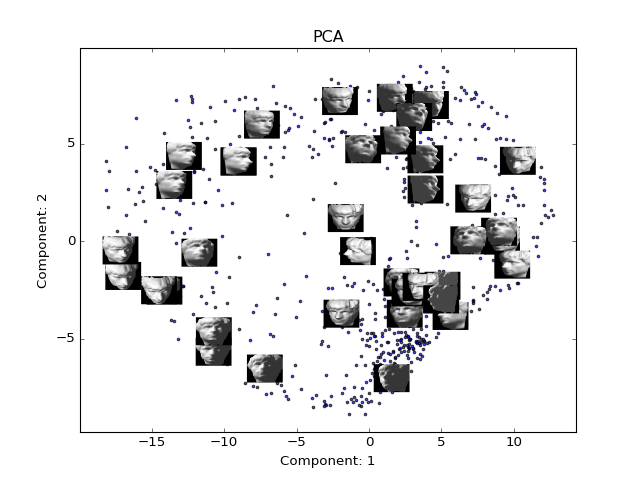

In [55]:
title = 'PCA'
Plot2D(T, title, x=1, y=2, num_to_plot=40)
plt.show()

In [60]:
#
# TODO: Implement Isomap here. Reduce the dataframe df down
# to THREE components. Once you've done that, call Plot2D using
# the first two components.
#
iso = manifold.Isomap(n_neighbors=3, n_components=3)
iso.fit(df)
manifold_1 = iso.transform(df)

<IPython.core.display.Javascript object>


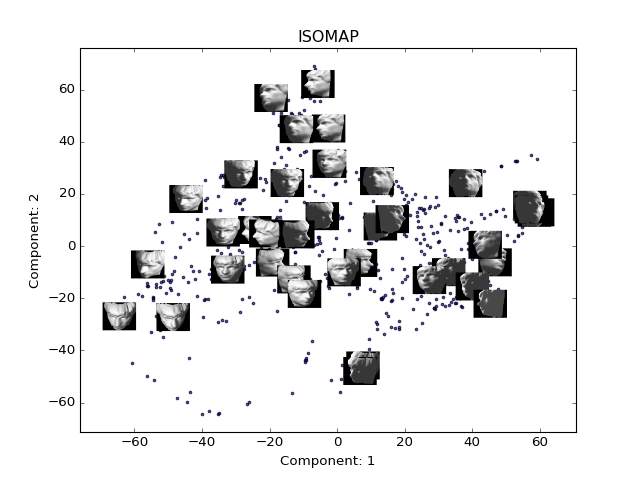

In [61]:
title = 'ISOMAP'
Plot2D(manifold_1, title, x=1, y=2, num_to_plot=40)
plt.show()

<IPython.core.display.Javascript object>


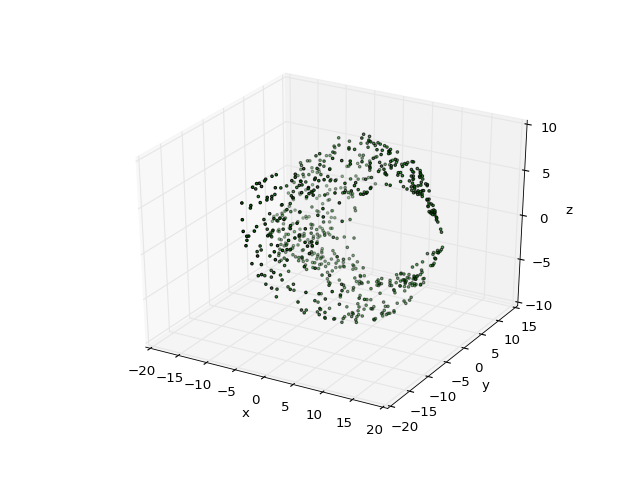

In [49]:
# TODO: If you're up for a challenge, draw your dataframes in 3D
# Even if you're not, just do it anyway.
#
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.scatter(df_pca.ix[:,0],df_pca.ix[:,1], df_pca.ix[:,2], c='green', marker='.')
plt.show()

In [47]:
df_pca =pd.DataFrame(T)
df_pca.head()

,0,1,2
0,-4.327873,2.408007,-5.320985
1,3.394693,2.297443,7.529921
2,-6.279761,2.193509,-5.004538
3,1.103629,-7.177100,4.342146
4,5.053002,-0.557390,-5.897226


In [51]:
df_manifold =pd.DataFrame(manifold_1)
df_manifold.head()

,0,1,2
0,-33.288265,-6.327824,-5.934053
1,37.462258,17.112243,-9.400799
2,-28.703444,-5.788484,-2.224031
3,59.539638,32.794338,23.821681
4,-47.311031,-7.156533,32.680683


<IPython.core.display.Javascript object>


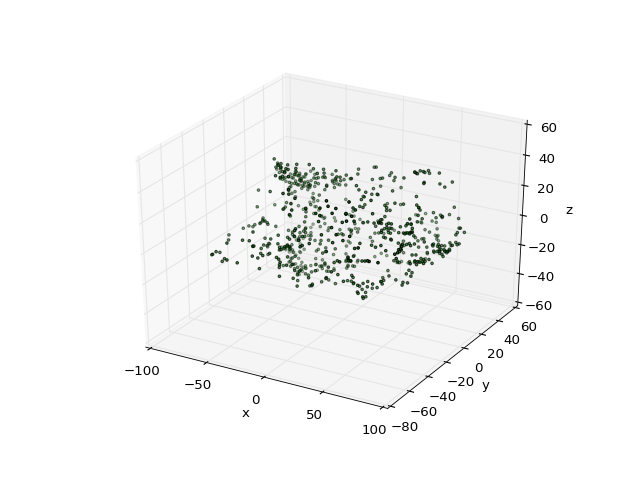

In [52]:
# TODO: If you're up for a challenge, draw your dataframes in 3D
# Even if you're not, just do it anyway.
#
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.scatter(df_manifold.ix[:,0],df_manifold.ix[:,1], df_manifold.ix[:,2], c='green', marker='.')
plt.show()

In [21]:
mat['images'].shape


(4096, 698)